## 5. Forecasting
* This file deals with time series analysis and forecasting. 
* The trends in popularity of a song over timme are analyzed and visualised.
* The change in popularity of the song is also forecasted.
### 5.1 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pylab import rcParams
import statsmodels.tsa.seasonal as smts
import statsmodels.tsa as smt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.statespace.sarimax as sari
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


### 5.2 Importing data
* The data from 'borda_counts.csv' is imported in order to get the rankings and popularity score of the songs over time. 
* From the visualizations and basic EDA it was clear that the  two most  popular songs from 2017-2018 were 'Shape of You' and 'Havana'.
* Hence the data of these two songs are considered with respect to the  'global' region.
* Data about 'Shape of You' is stored in 'Shape_Data' and 'Havana' in 'Hav_Data'

In [2]:
data=pd.read_csv('borda_counts.csv')

global_data=pd.DataFrame(data.loc[data['Region']=='global'])

Shape_Data = global_data[global_data['Track_Name'] == 'Shape of You'][['Date','borda_count']]
Hav_Data= global_data[global_data['Track_Name'] == 'Havana'][['Date','borda_count']]

### 5.3 Visualizing popularity time series data
*  For easier visualization the average monthly borda_count (popularity score) is used with the start of each month as the timestamp.
* Distinguishable patterns are observed in the plot. 
* The popularity seems to have  peeked around the beginning of 2018



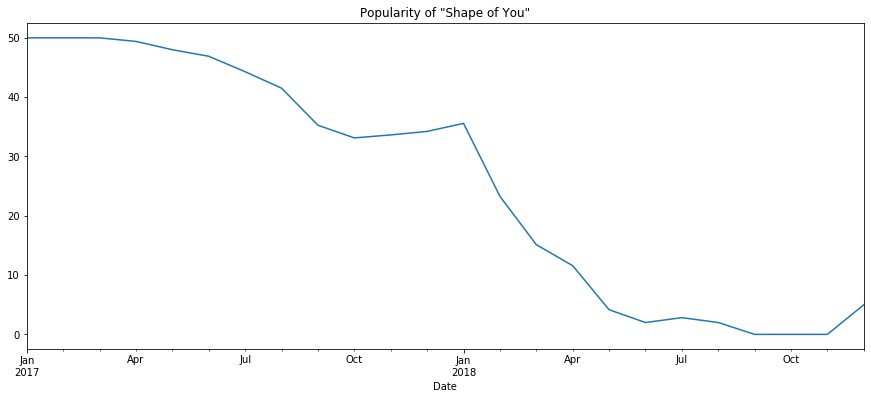

In [3]:
# Convert data in 'Date' column to DateTime format and set as index
Shape_Data['Date'] = pd.to_datetime(Shape_Data['Date'])
Shape_Data=Shape_Data.set_index('Date')

 # resample to get monthly average
trend_shape = Shape_Data['borda_count'].resample('MS').mean().fillna(0)

trend_shape.plot(figsize=(15, 6))
plt.title('Popularity of "Shape of You"') 
plt.show()


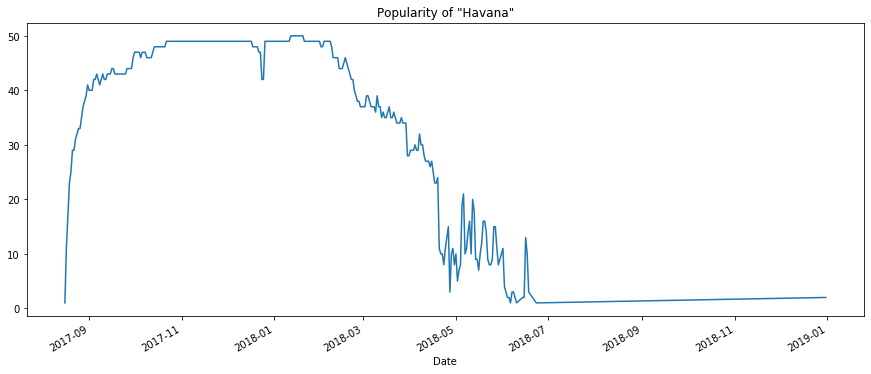

In [4]:
# Convert data in 'Date' column to DateTime format and set as index
Hav_Data['Date'] = pd.to_datetime(Hav_Data['Date'])
Hav_Data=Hav_Data.set_index('Date')

# As the Havana data is relatively sparse with respect frequency, it is not sampled but used as such.
trend_Havana = Hav_Data['borda_count']

trend_Havana.plot(figsize=(15, 6))
plt.title('Popularity of "Havana"') 
plt.show()

### 5.4 Time Series Decomposition
* Decompose time series into three distinct components: trend, seasonality, and noise to better understand the changes.


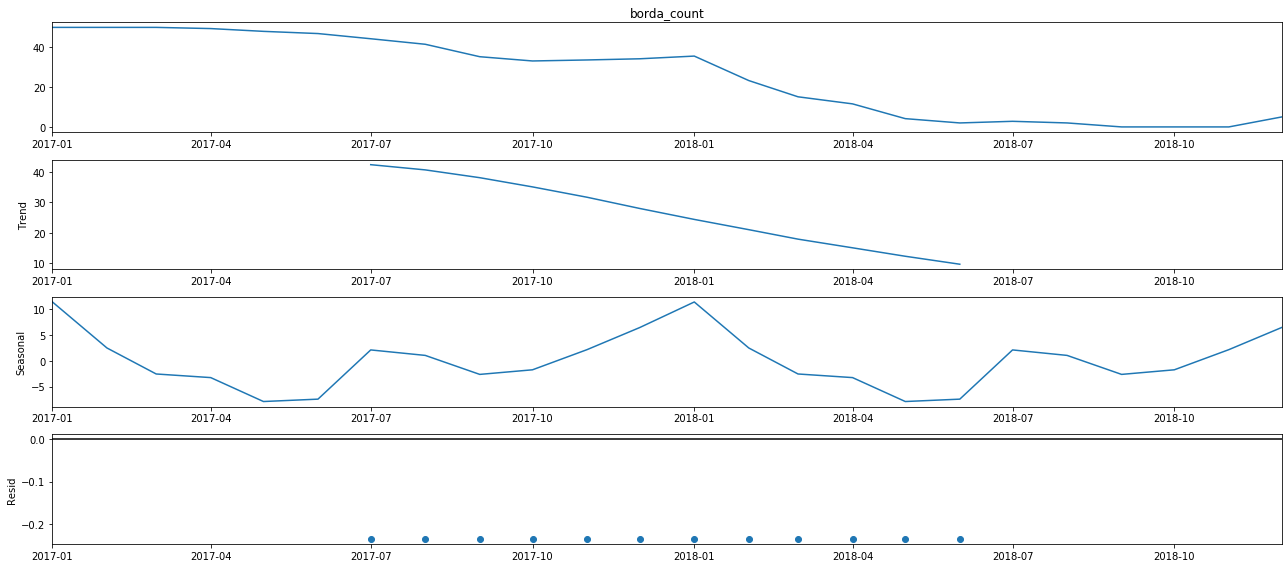

In [5]:
rcParams['figure.figsize'] = 18, 8
decomposition = smts.seasonal_decompose(trend_shape, model='additive')
fig = decomposition.plot()
plt.show()

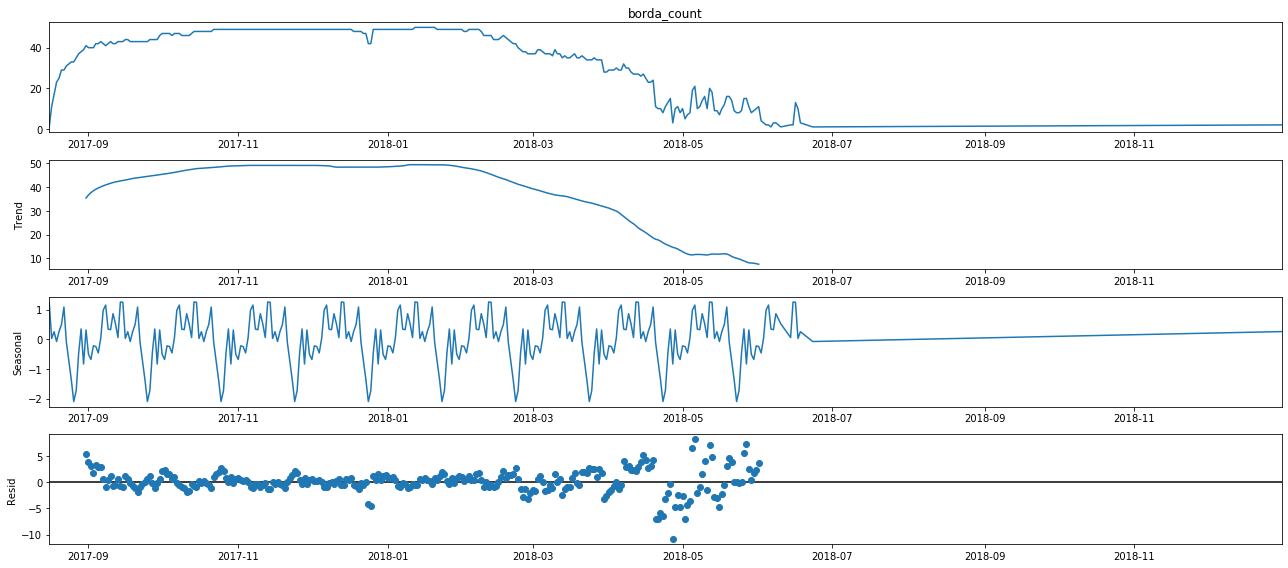

In [6]:
rcParams['figure.figsize'] = 18, 8
decomposition = smts.seasonal_decompose(trend_Havana, model='additive',period=30)
fig = decomposition.plot()
plt.show()


### 5.5 Time series modelling with Prohpet
* Using Prophet to  analyze time-series and find patterns on different time scales such as yearly, weekly and daily.
* There is a clear decline in the popularity of the song after a perios of two years. 
* The forecast/prediction of the popularity is also plotted, along with the confidence intervals of the predictions. 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


<Figure size 1296x432 with 0 Axes>

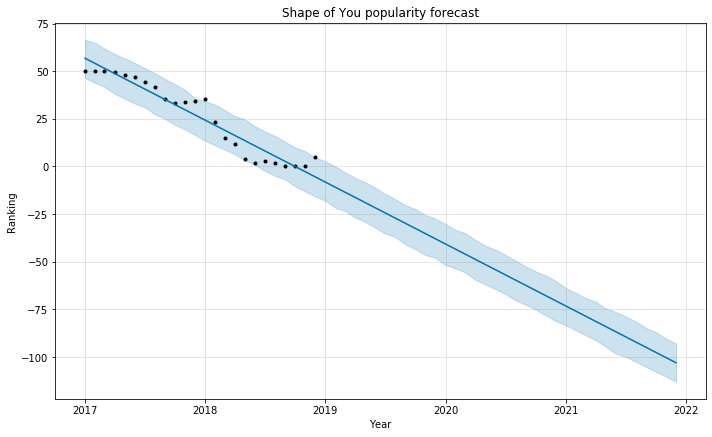

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,56.784122,46.454021,66.503081,56.784122,56.784122,0.0,0.0,0.0,0.0,0.0,0.0,56.784122
1,2017-02-01,54.025231,43.825231,64.803807,54.025231,54.025231,0.0,0.0,0.0,0.0,0.0,0.0,54.025231
2,2017-03-01,51.533328,41.729657,61.837485,51.533328,51.533328,0.0,0.0,0.0,0.0,0.0,0.0,51.533328
3,2017-04-01,48.774437,38.188213,59.044798,48.774437,48.774437,0.0,0.0,0.0,0.0,0.0,0.0,48.774437
4,2017-05-01,46.104542,35.577219,56.780450,46.104542,46.104542,0.0,0.0,0.0,0.0,0.0,0.0,46.104542
5,2017-06-01,43.345650,33.071595,54.308411,43.345650,43.345650,0.0,0.0,0.0,0.0,0.0,0.0,43.345650
6,2017-07-01,40.675755,31.100483,51.642242,40.675755,40.675755,0.0,0.0,0.0,0.0,0.0,0.0,40.675755
7,2017-08-01,37.916863,27.417992,48.928999,37.916863,37.916863,0.0,0.0,0.0,0.0,0.0,0.0,37.916863
8,2017-09-01,35.157971,24.996496,45.934442,35.157971,35.157971,0.0,0.0,0.0,0.0,0.0,0.0,35.157971
9,2017-10-01,32.488076,21.889659,43.181675,32.488076,32.488076,0.0,0.0,0.0,0.0,0.0,0.0,32.488076


In [7]:
shape_model_data=pd.DataFrame(columns=['ds','y'])
shape_model_data['ds']=trend_shape.index
shape_model_data['y']=trend_shape.values

shape_model=Prophet(interval_width=0.95)
shape_model.fit(shape_model_data)
shape_future=shape_model.make_future_dataframe(periods=36, freq='MS')
shape_forecast=shape_model.predict(shape_future)



plt.figure(figsize=(18, 6))
shape_model.plot(shape_forecast, xlabel = 'Year', ylabel = 'Ranking')
plt.title('Shape of You popularity forecast');
plt.show()

shape_forecast.head(10)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

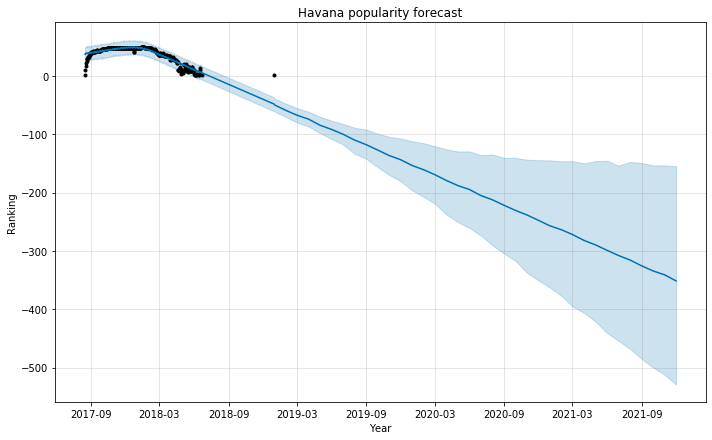

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-16,38.419924,25.361127,49.685667,38.419924,38.419924,-0.780210,-0.780210,-0.780210,-0.780210,-0.780210,-0.780210,0.0,0.0,0.0,37.639714
1,2017-08-17,38.520259,26.013374,50.163491,38.520259,38.520259,-0.355638,-0.355638,-0.355638,-0.355638,-0.355638,-0.355638,0.0,0.0,0.0,38.164621
2,2017-08-18,38.620595,26.639676,50.080907,38.620595,38.620595,-0.931794,-0.931794,-0.931794,-0.931794,-0.931794,-0.931794,0.0,0.0,0.0,37.688801
3,2017-08-19,38.720931,27.469153,49.353380,38.720931,38.720931,0.601990,0.601990,0.601990,0.601990,0.601990,0.601990,0.0,0.0,0.0,39.322921
4,2017-08-20,38.821267,28.015598,51.360489,38.821267,38.821267,0.505561,0.505561,0.505561,0.505561,0.505561,0.505561,0.0,0.0,0.0,39.326828
5,2017-08-21,38.921603,28.262513,52.505100,38.921603,38.921603,1.039412,1.039412,1.039412,1.039412,1.039412,1.039412,0.0,0.0,0.0,39.961015
6,2017-08-22,39.021938,27.883632,50.067228,39.021938,39.021938,-0.079321,-0.079321,-0.079321,-0.079321,-0.079321,-0.079321,0.0,0.0,0.0,38.942618
7,2017-08-23,39.122274,26.471702,51.335480,39.122274,39.122274,-0.780210,-0.780210,-0.780210,-0.780210,-0.780210,-0.780210,0.0,0.0,0.0,38.342064
8,2017-08-24,39.222610,27.422654,50.609528,39.222610,39.222610,-0.355638,-0.355638,-0.355638,-0.355638,-0.355638,-0.355638,0.0,0.0,0.0,38.866972
9,2017-08-25,39.322946,26.831177,48.837637,39.322946,39.322946,-0.931794,-0.931794,-0.931794,-0.931794,-0.931794,-0.931794,0.0,0.0,0.0,38.391151


In [8]:
model_data=pd.DataFrame(columns=['ds','y'])
model_data['ds']=trend_Havana.index
model_data['y']=trend_Havana.values

Hav_model=Prophet(interval_width=0.95)
Hav_model.fit(model_data)
Hav_future=Hav_model.make_future_dataframe(periods=36, freq='MS')

Hav_forecast=Hav_model.predict(Hav_future)

plt.figure(figsize=(18, 6))
Hav_model.plot(Hav_forecast, xlabel = 'Year', ylabel = 'Ranking')
plt.title('Havana popularity forecast');
plt.show()

Hav_forecast.head(10)

### 5.6 Merging Forecast to compare trends
* The Forecasts of both songs are merged and the trends are plotted in a single graph.
* Both songs seem to have the same trend. There is a decrease in popularity over time.
* Howeve for a brief period, "Havana" seems to have  been more popular than 'Shape of you' although in general the latter is more popular. 

In [9]:
shape_names = ['shape_%s' % column for column in shape_forecast.columns]
havana_names = ['havana_%s' % column for column in Hav_forecast.columns]


merge_havana_forecast = Hav_forecast.copy()
merge_shape_forecast = shape_forecast.copy()

merge_shape_forecast.columns = shape_names
merge_havana_forecast.columns = havana_names

forecast = pd.merge(merge_shape_forecast, merge_havana_forecast, how = 'inner', left_on = 'shape_ds', right_on = 'havana_ds')

forecast = forecast.rename(columns={'shape_ds': 'Date'}).drop('havana_ds', axis=1)
forecast.head()

,Date,shape_trend,shape_yhat_lower,shape_yhat_upper,shape_trend_lower,shape_trend_upper,shape_additive_terms,shape_additive_terms_lower,shape_additive_terms_upper,shape_multiplicative_terms,...,havana_additive_terms,havana_additive_terms_lower,havana_additive_terms_upper,havana_weekly,havana_weekly_lower,havana_weekly_upper,havana_multiplicative_terms,havana_multiplicative_terms_lower,havana_multiplicative_terms_upper,havana_yhat
0,2017-09-01,35.157971,24.996496,45.934442,35.157971,35.157971,0.0,0.0,0.0,0.0,...,-0.931794,-0.931794,-0.931794,-0.931794,-0.931794,-0.931794,0.0,0.0,0.0,39.093502
1,2017-10-01,32.488076,21.889659,43.181675,32.488076,32.488076,0.0,0.0,0.0,0.0,...,0.505561,0.505561,0.505561,0.505561,0.505561,0.505561,0.0,0.0,0.0,43.540931
2,2017-11-01,29.729185,19.436036,40.158778,29.729185,29.729185,0.0,0.0,0.0,0.0,...,-0.780210,-0.780210,-0.780210,-0.780210,-0.780210,-0.780210,0.0,0.0,0.0,45.342368
3,2017-12-01,27.059289,16.660698,35.827176,27.059289,27.059289,0.0,0.0,0.0,0.0,...,-0.931794,-0.931794,-0.931794,-0.931794,-0.931794,-0.931794,0.0,0.0,0.0,47.751932
4,2018-01-01,24.300398,13.472911,34.189134,24.300398,24.300398,0.0,0.0,0.0,0.0,...,1.039412,1.039412,1.039412,1.039412,1.039412,1.039412,0.0,0.0,0.0,49.936813


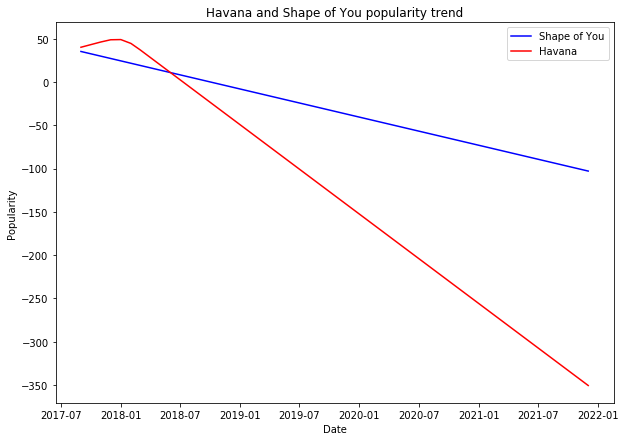

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['shape_trend'], 'b-',label='Shape of You')
plt.plot(forecast['Date'], forecast['havana_trend'], 'r-',label='Havana')
plt.legend();  plt.xlabel('Date'); plt.ylabel('Popularity')
plt.title('Havana and Shape of You popularity trend');

### 5.7 Song Data - Average number of songs ranked
* The total number  of unique songs that find a place in the rankings globally is obtained. 
* This is plotted to find the trend in average number of songs that get ranked every month.
* The forecast/prediction of the number of songs has also been plotted. 
* There is a clear upwards trend. This could be attributed to the following reasons:
    * As new songs come out over time, they get added to the rankings. 
    * However, the rate at which older songs disappear from the rankings is less, and hence there is an upwards trend. 

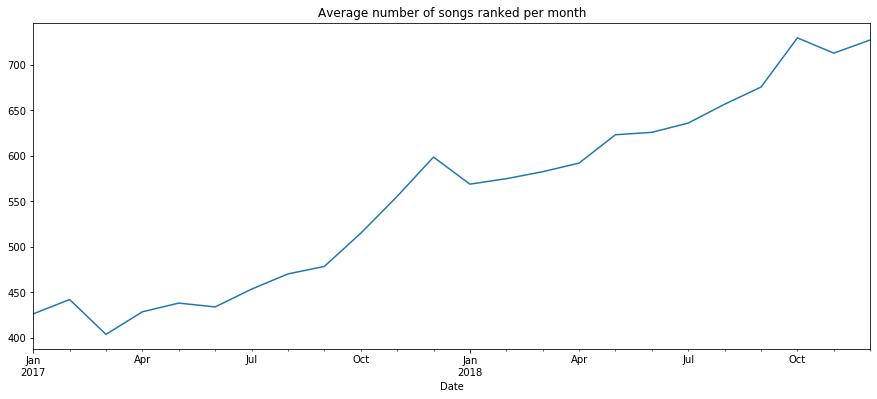

In [11]:
data=pd.read_csv('cleaned_ranks.csv')
datewise_data=(data.groupby(['Date'])['Track_Name'].unique())
count=[]
for date in datewise_data:
    count.append(len(date))

songs_per_day=pd.DataFrame(columns=['Date','No_of_songs'])
songs_per_day['Date']=datewise_data.index
songs_per_day['No_of_songs']=count

songs_per_day['Date'] = pd.to_datetime(songs_per_day['Date'])
songs_per_day=songs_per_day.set_index('Date')
# songs_per_day
songs_per_day = songs_per_day['No_of_songs'].resample('MS').mean().fillna(0)
songs_per_day.plot(figsize=(15, 6))
plt.title('Average number of songs ranked per month') 
plt.show()

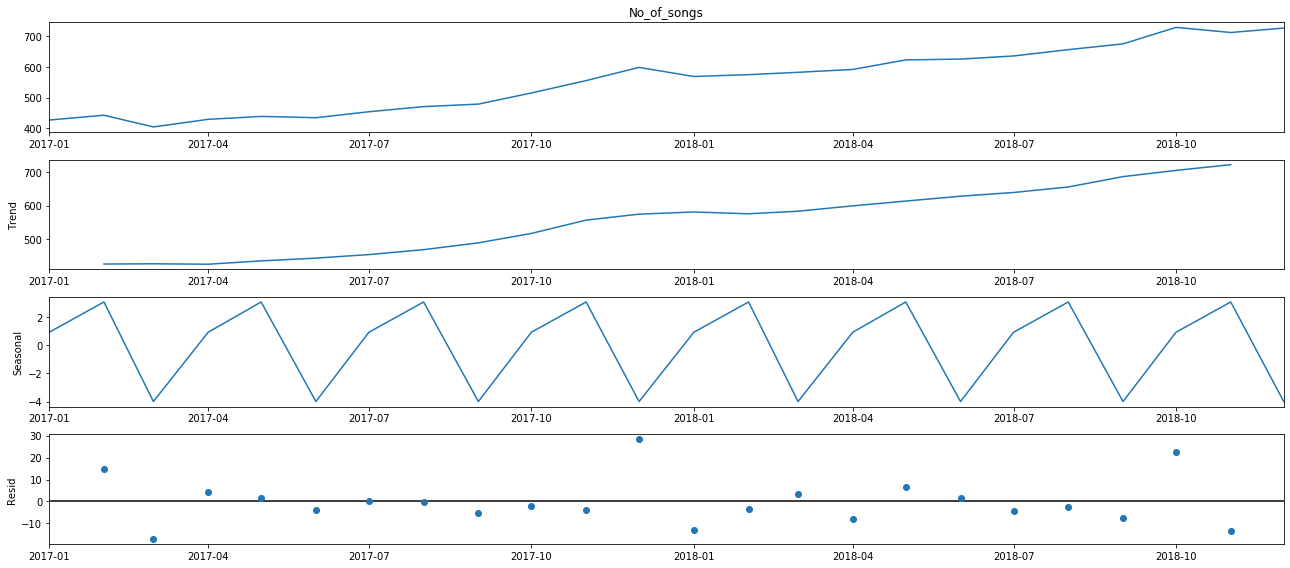

In [12]:
rcParams['figure.figsize'] = 18, 8
decomposition = smts.seasonal_decompose(songs_per_day, model='additive',period=3)
fig = decomposition.plot()
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


<Figure size 1296x432 with 0 Axes>

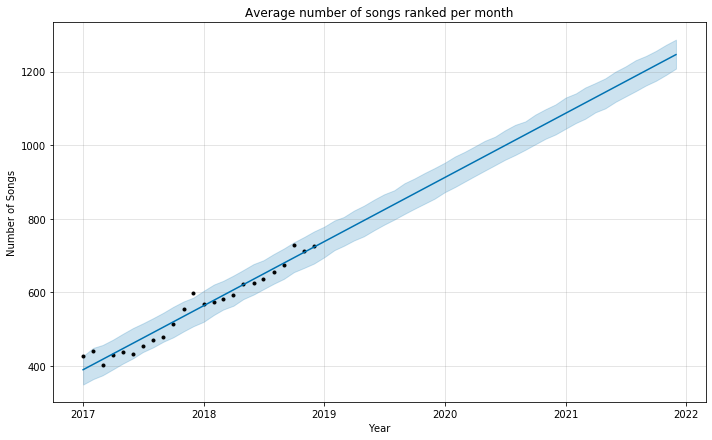

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,390.011609,349.678898,427.150664,390.011609,390.011609,0.0,0.0,0.0,0.0,0.0,0.0,390.011609
1,2017-02-01,404.752421,364.680542,449.291984,404.752421,404.752421,0.0,0.0,0.0,0.0,0.0,0.0,404.752421
2,2017-03-01,418.066703,374.784188,457.063761,418.066703,418.066703,0.0,0.0,0.0,0.0,0.0,0.0,418.066703
3,2017-04-01,432.807515,390.755761,471.343942,432.807515,432.807515,0.0,0.0,0.0,0.0,0.0,0.0,432.807515
4,2017-05-01,447.074149,406.431903,487.309853,447.074149,447.074149,0.0,0.0,0.0,0.0,0.0,0.0,447.074149


In [13]:
model_data=pd.DataFrame(columns=['ds','y'])
model_data['ds']=songs_per_day.index
model_data['y']=songs_per_day.values

songs_model=Prophet(interval_width=0.95)
songs_model.fit(model_data)
songs_future=songs_model.make_future_dataframe(periods=36, freq='MS')

songs_forecast=songs_model.predict(songs_future)


plt.figure(figsize=(18, 6))
songs_model.plot(songs_forecast, xlabel = 'Year', ylabel = 'Number of Songs')
plt.title('Average number of songs ranked per month');
plt.show()

songs_forecast.head(5)

# plt.figure(figsize=(10, 7))
# plt.plot(songs_forecast.index, songs_forecast['trend'], 'b-')
# plt.xlabel('Date'); plt.ylabel('Number of Songs')
# plt.title('Average number of songs ranked per month');